This is a follow-along notebook of *Building Blocks of LangGraph* from [Hugging Face Agents Course](https://huggingface.co/learn/agents-course/unit2/langgraph/building_blocks), with additional trials. 

# Building Blocks of LangGraph
An application in LangGraph starts from an entrypoint, and depending on the execution, the flow may go to one function or another until it reaches the `END`.
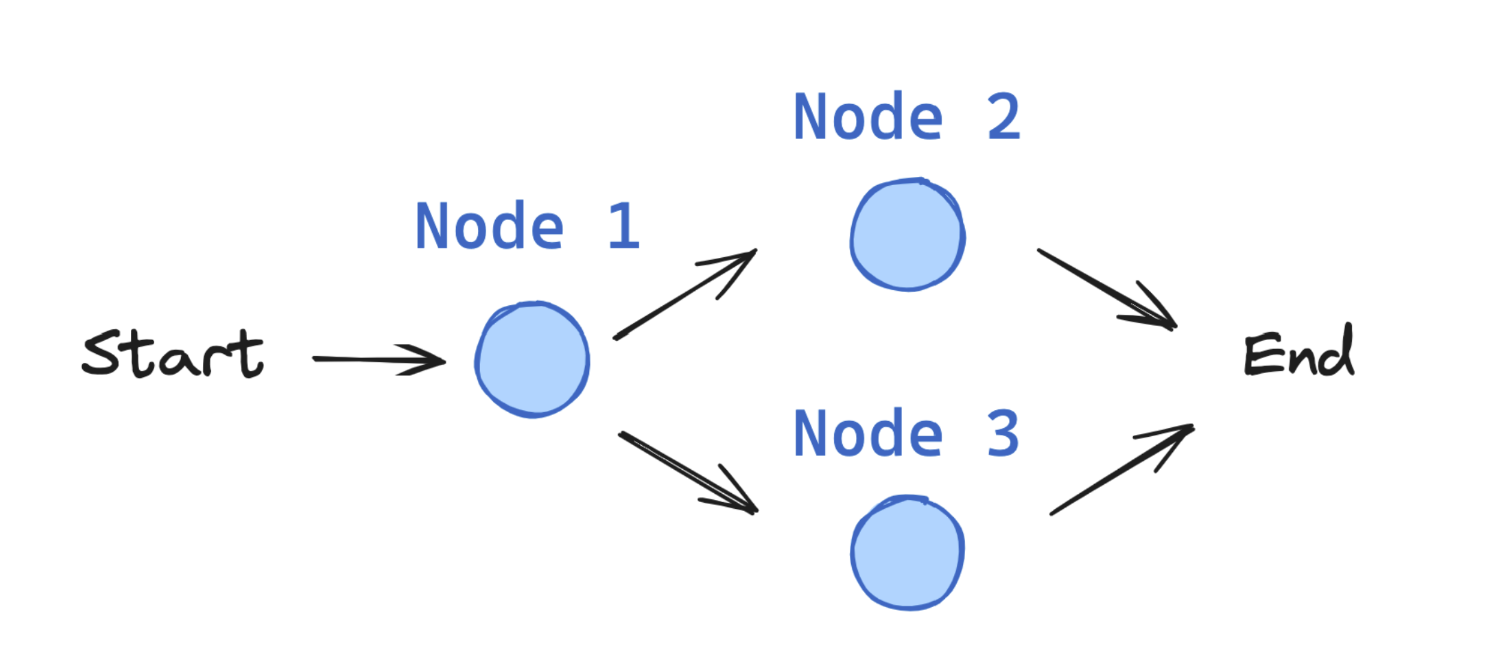

## 1. State
State is the central concept in LangGraph. It represents all the **information** that flows through your application. The state is **user-defined**, hence the fields should carefully be crafted to contain all data needed for decision-making process!

> *💡 Tip: Think carefully about what information your application needs to **track** between steps.*

In [1]:
from typing_extensions import TypedDict

class State(TypedDict): 
    graph_state: str

## 2. Nodes
Nodes are python functions. Each node:
-   Takes the state as input
-   Performs some operation
-   Returns updates to the state

For example, Nodes can contain:
-   **LLM calls**: Generate text or make decisions
-   **Tool calls**: Interact with external systems
-   **Conditional logic**: Determine next steps
-   **Human intervention**: Get input from users

> *💡 **Info**: Some nodes necessary for the whole workflow like `START` and `END` exist from langGraph directly.*

In [51]:
def node_1(state): 
    print("===NODE 1===")
    print("===state===")
    print(state)
    return {"graph_state": state["graph_state"] + " I am"}

def node_2(state): 
    print("===NODE 2===")
    print("===state===")
    print(state)    
    return {"graph_state": state["graph_state"] + " happy!"}

def node_3(state): 
    print("===NODE 3===")
    print("===state===")
    print(state)    
    return {"graph_state": state["graph_state"] + " sad!"}

## 3. Edges
Edges connect nodes and define the **possible paths** through your graph. 

Edges can be:
- **Direct**: Always go from node A to node B
- **Conditional**: Choose the next node based on the current state

In [5]:
import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]: 
    # Use `state` to decide the next node to visit
    user_input = state["graph_state"]

    # Random 50 / 50 split between node 2 and node 3
    if random.random() < 0.5: 
        return "node_2"
    else: 
        return "node_3"

## 4. StateGraph
The StateGraph is the **container** that holds your *entire agent workflow*. 

In [7]:
%pip install langgraph -Uqq

Note: you may need to restart the kernel to use updated packages.


In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [ ]:
# Add nodes
builder = StateGraph(State)  # the class `State` defined at the start
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

In [10]:
State

__main__.State

In [11]:
type(State)

typing_extensions._TypedDictMeta

In [12]:
builder

In [ ]:
builder.nodes

{'node_1': StateNodeSpec(runnable=node_1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None, input=<class '__main__.State'>, retry_policy=None, cache_policy=None, ends=(), defer=False),
 'node_2': StateNodeSpec(runnable=node_2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None, input=<class '__main__.State'>, retry_policy=None, cache_policy=None, ends=(), defer=False),
 'node_3': StateNodeSpec(runnable=node_3(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None, input=<class '__main__.State'>, retry_policy=None, cache_policy=None, ends=(), defer=False)}

In [13]:
builder.branches

defaultdict(dict, {})

In [14]:
builder.channels

{'graph_state': <langgraph.channels.last_value.LastValue at 0x112b13600>}

In [17]:
builder.edges

set()

In [18]:
builder.schemas

{__main__.State: {'graph_state': <langgraph.channels.last_value.LastValue at 0x112b13600>}}

In [20]:
builder.type_hints

{__main__.State: {'graph_state': str}}

In [ ]:
# Add edges (logic flow)
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

In [22]:
builder.edges

{('__start__', 'node_1'), ('node_2', '__end__'), ('node_3', '__end__')}

In [23]:
builder.waiting_edges

set()

In [24]:
builder.support_multiple_edges

False

In [25]:
# Add to graph
graph = builder.compile()

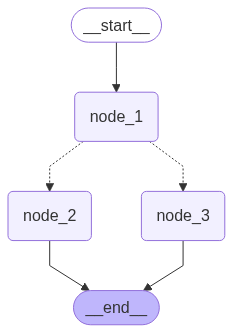

In [ ]:
# Graph visualilzation
graph

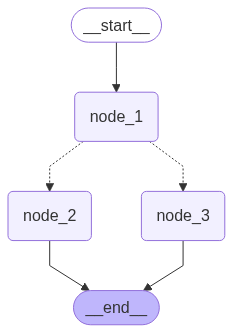

In [ ]:
# Graph visualilzation
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
graph.builder

In [31]:
graph.channels

{'graph_state': <langgraph.channels.last_value.LastValue at 0x112b13600>,
 '__start__': <langgraph.channels.ephemeral_value.EphemeralValue at 0x1102bc940>,
 'branch:to:node_1': <langgraph.channels.ephemeral_value.EphemeralValue at 0x1130cd700>,
 'branch:to:node_2': <langgraph.channels.ephemeral_value.EphemeralValue at 0x1130edac0>,
 'branch:to:node_3': <langgraph.channels.ephemeral_value.EphemeralValue at 0x1102bc5c0>}

In [ ]:
graph.get_prompts

<bound method Runnable.get_prompts of <langgraph.graph.state.CompiledStateGraph object at 0x112c5c920>>


In [34]:
graph.get_state

<bound method Pregel.get_state of <langgraph.graph.state.CompiledStateGraph object at 0x112c5c920>>

In [35]:
graph.get_graph

<bound method Pregel.get_graph of <langgraph.graph.state.CompiledStateGraph object at 0x112c5c920>>

In [36]:
graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnablePassthrough(), metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'node_3': Node(id='node_3', name='node_3', data=node_3(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=True), Edge(source='node_1', target='node_3', data=None, conditional=True), Edge(source='node_2', target='__end__', data=None, conditional=False), Edge(source='node_3', target='__end__', data=

In [38]:
graph.get_graph().edges

[Edge(source='__start__', target='node_1', data=None, conditional=False),
 Edge(source='node_1', target='node_2', data=None, conditional=True),
 Edge(source='node_1', target='node_3', data=None, conditional=True),
 Edge(source='node_2', target='__end__', data=None, conditional=False),
 Edge(source='node_3', target='__end__', data=None, conditional=False)]

In [40]:
graph.get_graph().draw_mermaid()

'---\nconfig:\n  flowchart:\n    curve: linear\n---\ngraph TD;\n\t__start__([<p>__start__</p>]):::first\n\tnode_1(node_1)\n\tnode_2(node_2)\n\tnode_3(node_3)\n\t__end__([<p>__end__</p>]):::last\n\t__start__ --> node_1;\n\tnode_1 -.-> node_2;\n\tnode_1 -.-> node_3;\n\tnode_2 --> __end__;\n\tnode_3 --> __end__;\n\tclassDef default fill:#f2f0ff,line-height:1.2\n\tclassDef first fill-opacity:0\n\tclassDef last fill:#bfb6fc\n'

In [43]:
graph.get_graph().draw_mermaid_png

<bound method Graph.draw_mermaid_png of Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnablePassthrough(), metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'node_3': Node(id='node_3', name='node_3', data=node_3(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=True), Edge(source='node_1', target='node_3', data=None, conditional=True), Edge(source='node_2', target='__end__', data=None, conditional=False), Edge(

In [44]:
print(graph)

## 5. Invoke

In [46]:
graph.invoke({"graph_state": "Hi, this is Notebook,"})

===NODE 1===
===NODE 2===


{'graph_state': 'Hi, this is Notebook, I am happy!'}

In [48]:
graph.invoke({"graph_state": "Hi, this is Notebook,"})

===NODE 1===
===NODE 3===


{'graph_state': 'Hi, this is Notebook, I am sad!'}

In [56]:
builder = StateGraph(State)  
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()
graph.invoke({"graph_state": "Hi, this is Notebook,"})

===NODE 1===
===state===
{'graph_state': 'Hi, this is Notebook,'}
===NODE 3===
===state===
{'graph_state': 'Hi, this is Notebook, I am'}


{'graph_state': 'Hi, this is Notebook, I am sad!'}